<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-Means Clustering with Seeds Data

_Instructor: Aymeric Flaisler_

---

In this lab we are going to try to group some plants using the K-Means algorithm.

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

### 1. Import the data

In [2]:
seeds = pd.read_csv("./datasets/seeds.csv")

In [3]:
# Taking a peek
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### 2. Do some EDA of relationships between features.

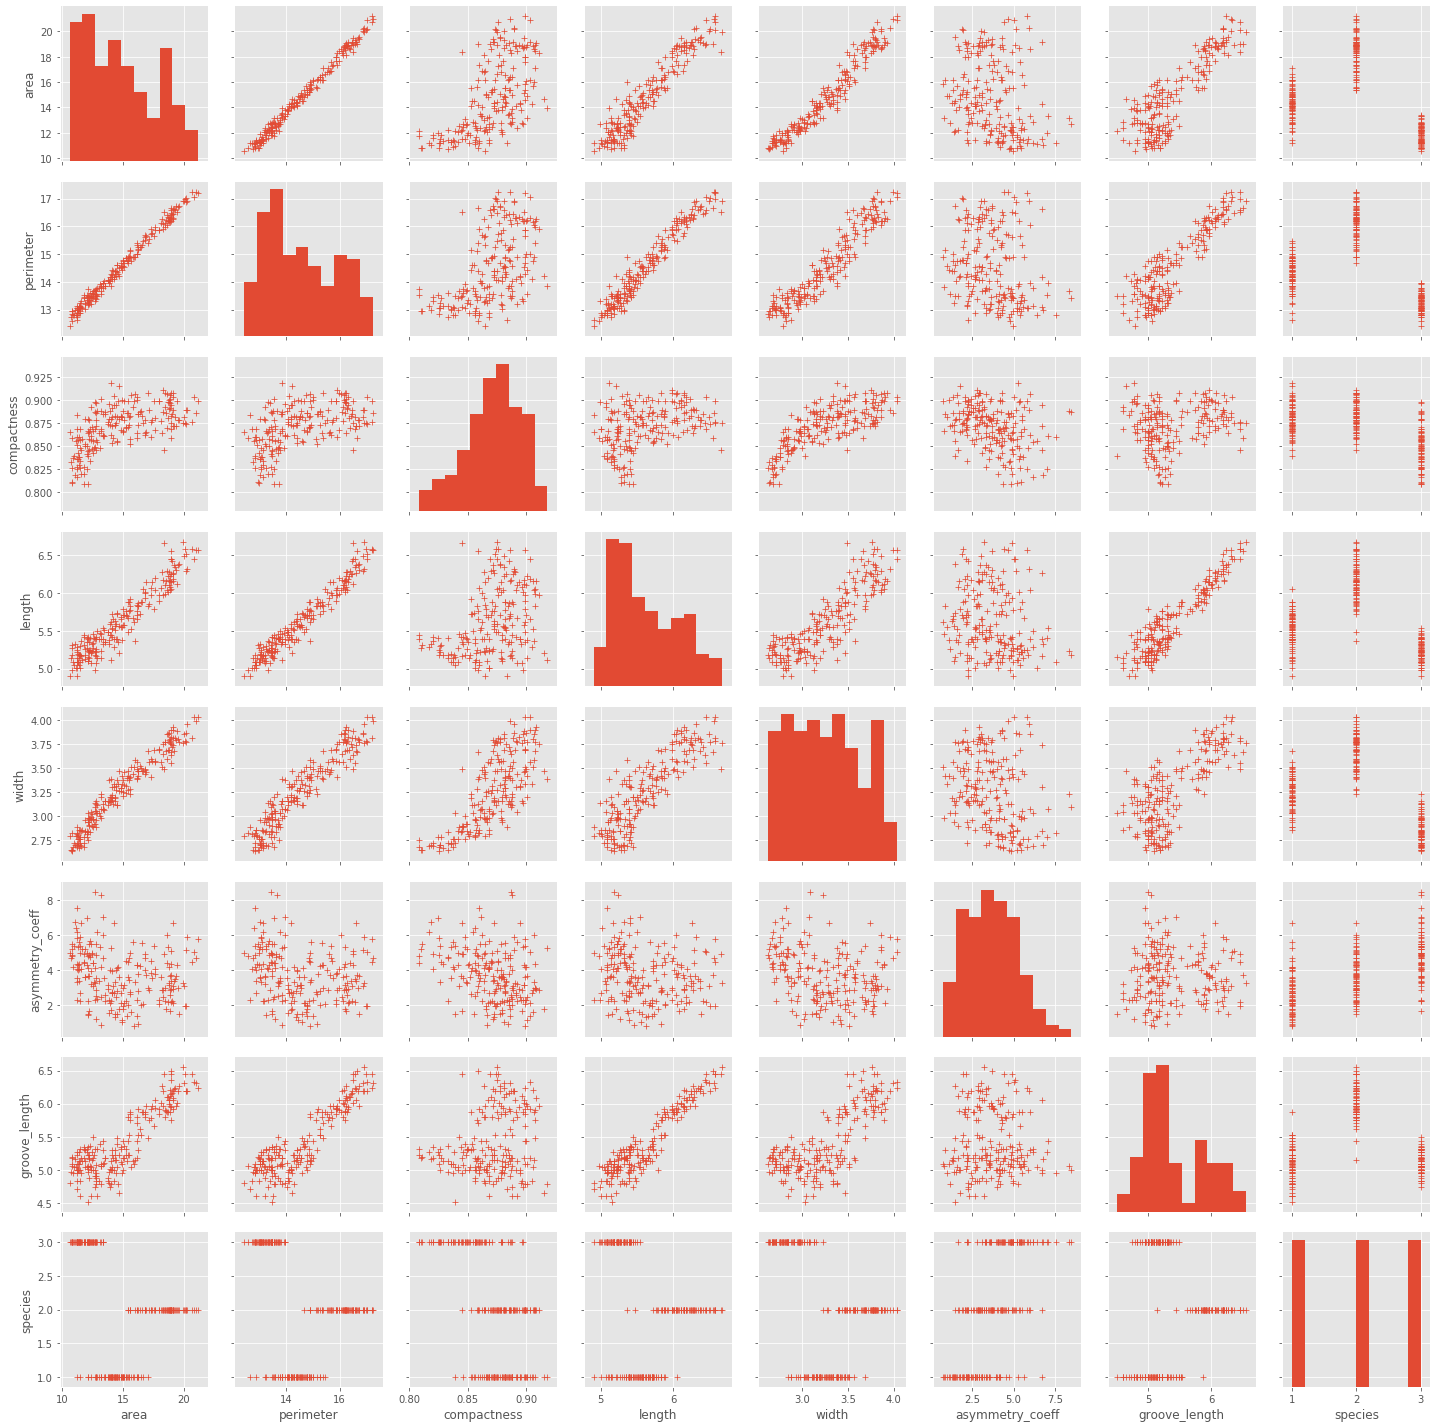

In [4]:
# Plot the Data to see the distributions/relationships
import seaborn as sns

# Plot with and without the "species" hue.
sns.pairplot(seeds, markers="+")
# sns.pairplot(seeds, hue='species')

In [5]:
# Check for nulls:
seeds.isnull().sum()

area               0
perimeter          0
compactness        0
length             0
width              0
asymmetry_coeff    0
groove_length      0
species            0
dtype: int64

/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


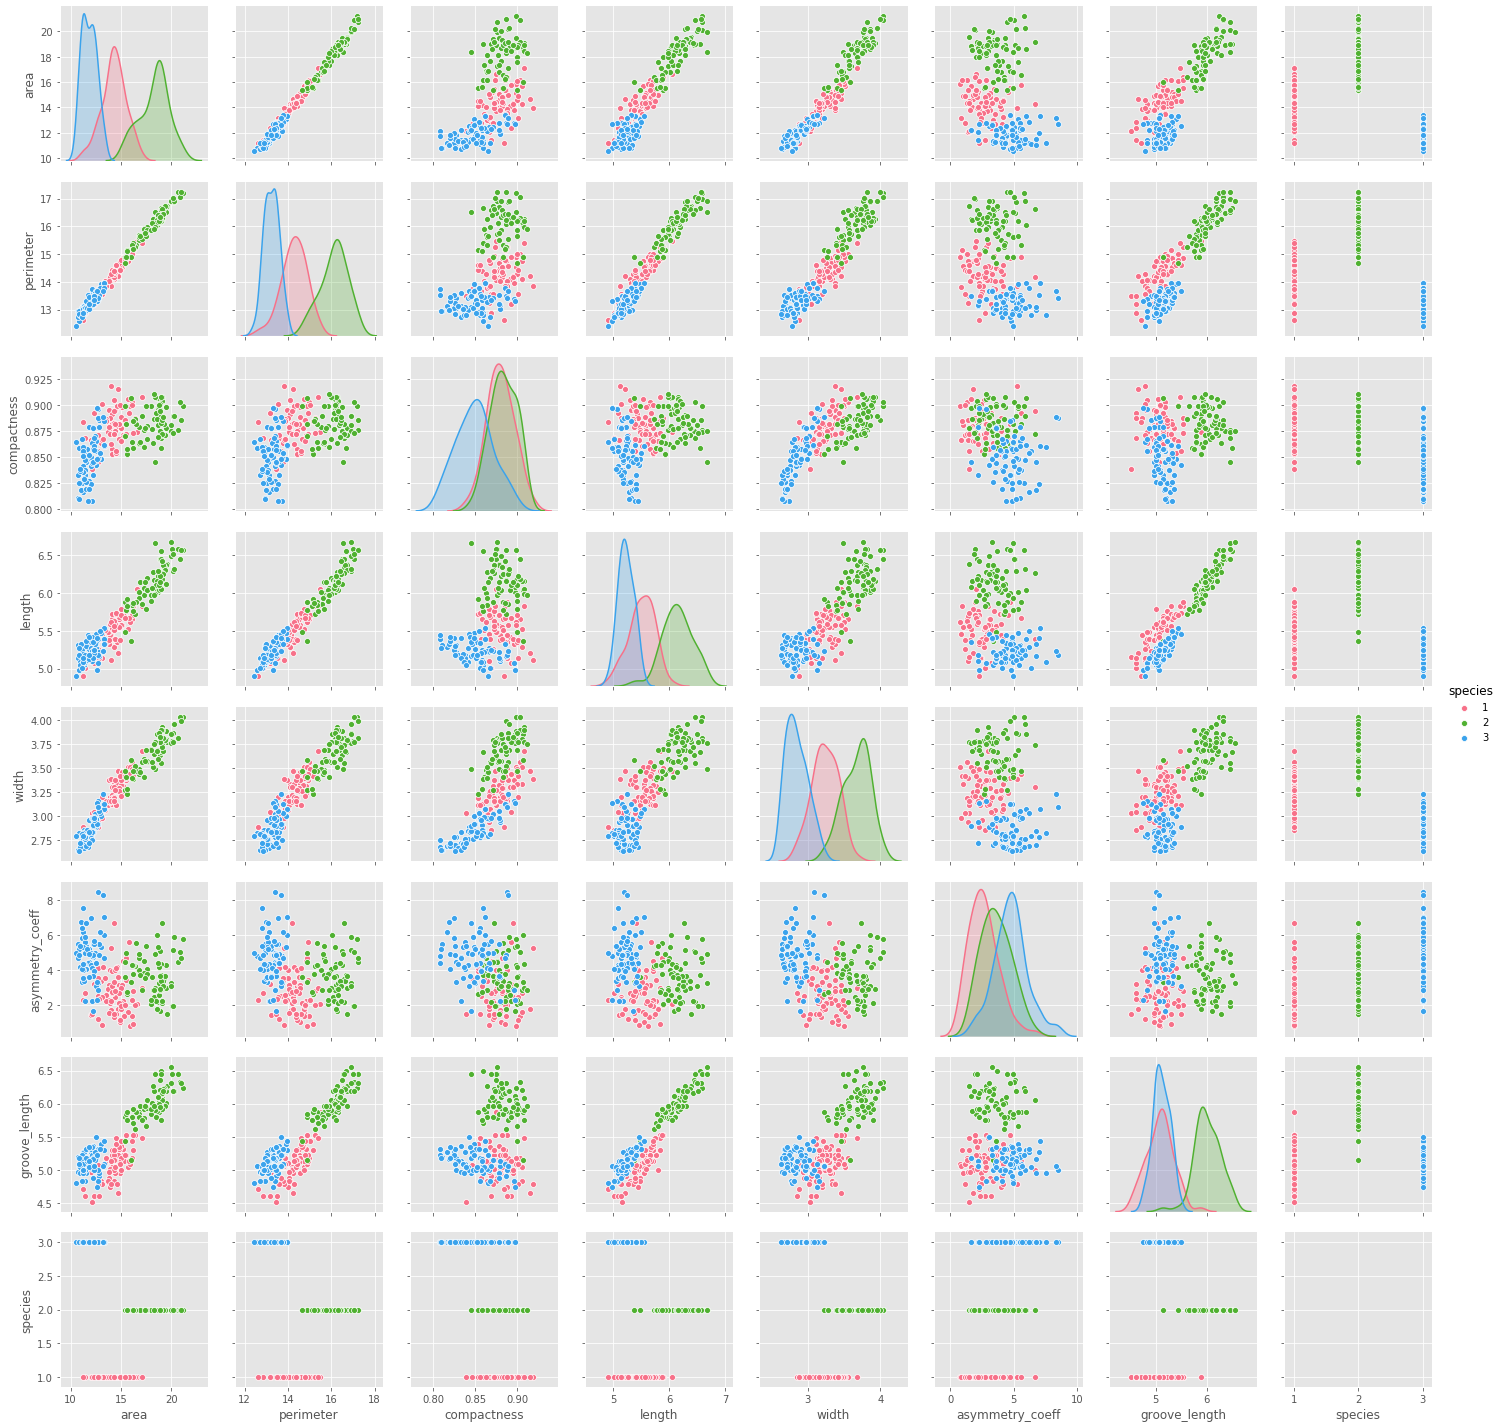

In [6]:
# Look at the real species labels.
sns.pairplot(data=seeds, hue='species', palette="husl")
# classes appear to have a similar number of samples.
# magenta consistently looks like the divisor between the green and red classes.

Remember, clustering is a unsupervised learning method so known classes will never be a thing.  In this situation we can see that the `perimiter` vs. `groove_length` is a good visualization to view the proper classes class, and we can use later to compare the results of clustering to a true value.

### 3. Prepare the data for clustering

1. Remove the `species` column. We will see if the clusters from K-Means end up like the actual species.
2. Put the features on the same scale.

In [7]:
# drop 'species', which is currently acting as a target (categorical):
X = seeds.drop(columns = 'species' , axis = 1)

In [8]:
# necessary processing imports
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
X = SS.fit_transform(X)

### 4. Clustering with K-Means

- Cluster the data to our our target groups.
- We know that there are 3 actual classes. However, in an actual situation in which we used clustering we would have no idea. Lets initally try using the default K for `KMeans`(8).

In [9]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=8).fit(X)

### 5. Get the labels and centroids for out first clustering model.

In [10]:
# A:
pred = kmean.labels_
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 6, 6, 2,
       2, 5, 2, 2, 6, 6, 2, 6, 5, 2, 6, 2, 2, 2, 0, 0, 2, 1, 2, 2, 5, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 6, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 6, 5, 5,
       2, 2, 2, 6, 0, 0, 0, 4, 0, 0, 0, 3, 3, 0, 0, 3, 3, 4, 4, 4, 4, 4,
       3, 3, 4, 4, 4, 3, 3, 0, 4, 4, 4, 4, 0, 4, 3, 4, 4, 4, 4, 0, 4, 4,
       4, 4, 4, 3, 3, 4, 3, 4, 4, 4, 3, 4, 0, 4, 2, 3, 3, 4, 4, 0, 4, 4,
       0, 0, 0, 2, 0, 0, 0, 0, 6, 1, 1, 1, 7, 7, 6, 6, 6, 7, 7, 7, 7, 7,
       7, 7, 6, 7, 7, 7, 6, 6, 7, 6, 7, 5, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 6, 7, 1, 6, 7, 1, 7, 7, 7, 1, 7, 7, 6, 5, 7, 6, 1, 1, 1,
       6, 5, 1, 5, 5, 1, 6, 5, 7, 1, 6, 1], dtype=int32)

In [11]:
cent = kmean.cluster_centers_
cent

array([[ 0.571446  ,  0.63420397,  0.20651071,  0.62899916,  0.53840009,
         0.1686345 ,  0.68981995],
       [-0.67620296, -0.7444876 ,  0.21160126, -0.8073773 , -0.46460961,
         1.6230064 , -0.65592273],
       [-0.04837208, -0.08268836,  0.57463292, -0.19718126,  0.12548398,
        -0.88397064, -0.59872523],
       [ 1.63148318,  1.60165894,  0.70962678,  1.55502709,  1.52983123,
         0.92090485,  1.50176461],
       [ 1.41486618,  1.4042356 ,  0.67031642,  1.40031965,  1.29000552,
        -0.6511154 ,  1.4508876 ],
       [-0.89025187, -1.01210693,  0.31397788, -1.16906062, -0.68010051,
        -0.84201137, -1.22875888],
       [-0.76950044, -0.72331107, -0.72142704, -0.60700934, -0.82970161,
         0.01148162, -0.53520867],
       [-1.20327342, -1.13565248, -1.56840289, -0.94755776, -1.38112761,
         0.90839221, -0.58537097]])

### 6. Compute the silouette score and visually examine the results of the 8 clusters. 

_(pairplot with hue)_

In [12]:
from sklearn.metrics import silhouette_score

silhouette_score(X , pred)

0.2736746450201235

### 7. Repeat steps #4 and #6 with two selected or random K values and compare the results to the k=8 model.

In [13]:
import random

random.randint(1,25), random.randint(1,25)

(23, 5)

In [14]:
kmean_7 = KMeans(n_clusters=7).fit(X)

In [15]:
pred_7 = kmean_7.labels_
pred_7

array([5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 3, 5, 5, 5, 5, 5, 0, 5, 5, 4, 5, 5,
       5, 4, 5, 5, 4, 4, 5, 4, 4, 3, 3, 5, 5, 5, 3, 1, 5, 0, 5, 5, 5, 3,
       5, 5, 5, 5, 5, 5, 5, 3, 3, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 4, 1, 3, 3, 1, 3, 3, 3, 6, 6, 1, 3, 6, 6, 1, 1, 1, 1, 6,
       6, 6, 1, 1, 1, 6, 6, 3, 1, 1, 1, 1, 3, 1, 6, 1, 1, 1, 1, 1, 6, 1,
       1, 1, 1, 6, 6, 1, 1, 1, 1, 6, 6, 1, 3, 1, 5, 1, 6, 1, 1, 3, 1, 1,
       3, 3, 3, 5, 1, 3, 3, 3, 2, 0, 0, 0, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 4, 4, 2, 4, 0, 0, 0,
       4, 4, 0, 4, 4, 0, 4, 4, 2, 0, 4, 0], dtype=int32)

In [16]:
silhouette_score(X , pred_7)

0.2799052852709223

In [17]:
kmean_3 = KMeans(n_clusters=3).fit(X)

In [18]:
pred_3 = kmean_3.labels_
pred_3

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [19]:
silhouette_score(X , pred_3)

0.4007270552751299

### 8. Build a function to find the optimal number of clusters using silhouette score as the criteria.
1. Function should accept a range and a dataframe as arguments
2. Returns the optimal K value, associate silhoutte and scaling method.
3. Your function should also consider the scaled results of the data. 
    - `normalize`, `StandardScaler`, `MinMaxScaler`


Once you have found the optimal K and version of the data, visualize the clusters.





In [20]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

In [21]:
# A:
def optimal_k (X) :
    kmean_scores = {}
    kmean_norm_scores = {}
    kmean_minMax_scores = {}
    max_kmean = 1
    max_kmean_minMax = 1
    max_kmean_norm = 1
    score_kmean = 0.0
    score_kmean_minMax = 0.0
    score_kmean_norm = 0.0
    max_k = 1
    max_score = 0.0
    scaling_method = ''
    
    x_n = normalize(X)
    mi= MinMaxScaler()
    x_m= mi.fit_transform(X)
    
    for k in range(2 , len(X)):
        
        kmean = KMeans(n_clusters=k).fit(X)
        group_kmean = kmean.labels_
        kmean_scores[k] = silhouette_score(X , group_kmean)
        
        kmean_norm=KMeans(n_clusters=k).fit(x_n)
        group_kmean_norm = kmean_norm.labels_
        kmean_norm_scores[k] = silhouette_score(X , group_kmean_norm)
        
        kmean_minMax=KMeans(n_clusters=k).fit(x_m)
        group_kmean_minMax = kmean_minMax.labels_
        kmean_minMax_scores[k] = silhouette_score(X , group_kmean_minMax)
        
    for key in kmean_scores.keys():
        if kmean_scores[key] > score_kmean:
            score_kmean = kmean_scores[key]
            max_kmean = key
        if kmean_norm_scores[key] > score_kmean_norm:
            score_kmean_norm = kmean_norm_scores[key]
            max_kmean_norm = key
        if kmean_minMax_scores[key] > score_kmean_minMax:
            score_kmean_minMax = kmean_minMax_scores[key]
            max_kmean_minMax = key

    if (score_kmean > score_kmean_norm) & (score_kmean > score_kmean_minMax) :
        max_k = max_kmean
        max_score = score_kmean
        scaling_method = 'StandardScaler'
    elif (score_kmean_norm > score_kmean) & (score_kmean_norm > score_kmean_minMax):
        max_k = max_kmean_norm
        max_score = score_kmean_norm
        scaling_method = 'Normalize'
    else :
        max_k = max_kmean_minMax
        max_score = score_kmean_minMax
        scaling_method = 'MinMaxScaler'
        
    return max_k , max_score , scaling_method

In [22]:
optimal_k (X)

(2, 0.46577247686580914, 'MinMaxScaler')